# 0. What is MountainCar?

A car is on a one-dimensional track, positioned between two "mountains". The goal is to drive up the mountain on the right; however, the car's engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum. 

### Action Space
- There are 3 discrete deterministic actions:


 Num | Observation                                                 | Value | Unit         |
-----|-------------------------------------------------------------|-------|--------------|
 0   | Accelerate to the left                                      | Inf   | position (m) |
 1   | Don't accelerate                                            | Inf   | position (m) |
 2   | Accelerate to the right                                     | Inf   | position (m) |

 
### Observation Space
The observation space is a 2-dim vector:
- the 1st element represents the "car position" 
- the 2nd element represents the "car velocity"


 Num | Observation                                                 | Min                | Max  | Unit         |
-----|-------------------------------------------------------------|--------------------|------|--------------|
 0   | position of the car along the x-axis                        | -Inf               | Inf  | position (m) |
 1   | velocity of the car                                         | -Inf               | Inf  | position (m) |
 
### Rewards
The goal is to reach the flag placed on top of the right hill as quickly as possible, as such the agent is penalised with a reward of -1 for each timestep it isn't at the goal and is not penalised (reward = 0) for when it reaches the goal.

### Transition Dynamics:
Given an action, the mountain car follows the following transition dynamics:
- *velocity<sub>t+1</sub> = velocity<sub>t</sub> + (action - 1) * force - cos(3 * position<sub>t</sub>) * gravity*
- *position<sub>t+1</sub> = position<sub>t</sub> + velocity<sub>t+1</sub>* where force = 0.001 and gravity = 0.0025.

- The collisions at either end are inelastic with the velocity set to 0 upon collision with the wall. The position is clipped to the range `[-1.2, 0.6]` and velocity is clipped to the range `[-0.07, 0.07]`.


### Episode Termination
The episode terminates if either of the following happens:
1. The position of the car is greater than or equal to 0.5 (the goal position on top of the right hill)
2. The length of the episode is 200.

2022-03-01 19:26:36.510 python[3199:181180] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f8671c23150>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-01 19:26:36.510 python[3199:181180] Warning: Expected min height of view: (<NSButton: 0x7f8671d0fed0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-01 19:26:36.512 python[3199:181180] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f8671d13270>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-01 19:26:36.514 python[3199:181180] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f8671d1afb0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


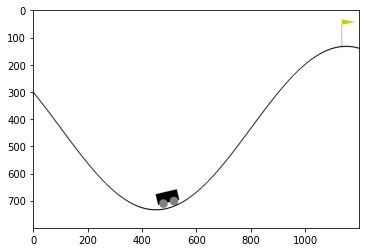

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0")
env.reset()

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

In [2]:
env.close()

# 1. Test Random Environment with OpenAi Gym

In [3]:
print(env.observation_space.shape[0])

env.observation_space.sample()               # Observation is just two numbers: car position and velocity

2


array([-0.06167909,  0.04642748], dtype=float32)

In [4]:
print(env.action_space.sample())            # 3 Actions are:
                                             # [0]:Accelerate to left,
                                             # [1]:Don't Accelerate, 
                                             # [2]:Accelerate to Right

0


In [5]:
env.action_space

Discrete(3)

In [6]:
action = env.action_space.sample()

n_state, reward, done, info = env.step(action)

print(env.step(action))

print('n_state:',n_state)
print('reward:',reward)
print('done:',done)
print('info:',info)

(array([-0.44491715,  0.00084615]), -1.0, False, {})
n_state: [-4.45763294e-01  4.24623156e-04]
reward: -1.0
done: False
info: {}


In [8]:
episodes = 5

for episode in range(1, episodes + 1):                     # looping from 1 to episodes + 1
    
    state = env.reset()                                    # initial set of observation
    
    done = False                                           # maximum number of steps in this particular environment
    
    score = 0                                              # running score counter
    
    while not done:
        
        env.render()                                       # view the graphical representation that environment(outside colab only)
        
        action = env.action_space.sample()

        n_state, reward, done, info = env.step(action)      # pass random actions to environment to get back 
                                                            # 1. next set of observation (4 observation in this case)
                                                            # 2. reward (Positive value increment, negative value decrement)
                                                            # 3. done (episode is done = True)
        
        score += reward
        
    print('Episode:{} Score:{}'.format(episode, score))    # print out score for each episode

Episode:1 Score:-200.0
Episode:2 Score:-200.0
Episode:3 Score:-200.0
Episode:4 Score:-200.0
Episode:5 Score:-200.0


In [9]:
env.close()

# 2. Create a Deep Learning Model with Keras

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [11]:
states = env.observation_space.shape[0]      

print('Number of States in the environemtn:', states)

actions = env.action_space.n                 # 3 Actions: Left, Don't accelerate, Right

print('Number of Actions in the environemtn:', actions)

Number of States in the environemtn: 2
Number of Actions in the environemtn: 3


In [12]:
def build_model(states, actions):
    model = Sequential()
    
    model.add(Flatten(input_shape = (1, states)))
    
    model.add(Dense(24, activation = 'relu'))
    
    model.add(Dense(24, activation = 'relu'))
    
    model.add(Dense(actions, activation = 'linear'))
    
    return model

In [19]:
del model

In [20]:
model = build_model(states, actions)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                72        
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 75        
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________


# 3. Build Agent with Keras-RL

***Two Types of Policy in RL:***
1. Value Base RL
2. Policy Base RL 

In [21]:
from rl.agents import DQNAgent              # used DQNAgent here, should try other agents: SARSAAgent      
from rl.policy import BoltzmannQPolicy      # used Policy base RL with BoltzmannQPolicy 
from rl.memory import SequentialMemory

In [22]:
def build_agent(model, actions):            # build an Agent to train our model
    
    policy = BoltzmannQPolicy()
    
    memory = SequentialMemory(limit = 50000,
                              window_length = 1
                             )
    
    dqn = DQNAgent(model = model, 
                   memory = memory,
                   policy = policy,
                   nb_actions = actions, 
                   nb_steps_warmup = 10,
                   target_model_update = 1e-2
                  )
    
    return dqn

In [23]:
import os
log_path = os.path.join("Training", "Logs", "MountainCar-v0")

In [24]:
log_path

'Training/Logs/MountainCar-v0'

In [61]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

save_path = os.path.join('Training', 'Saved Models')

stop_callback = StopTrainingOnRewardThreshold(reward_threshold = 200, verbose = 1)  # stop traing when achieve 200 reward

eval_callback = EvalCallback(env, 
                             callback_on_new_best = stop_callback,      # every time new best model, then run stop_callback. When stop_callback achieve 200 reward, then stop the training
                             eval_freq = 10000,                         # set how often to run eval_callback 
                             best_model_save_path = save_path,
                             verbose = 1
                            )

In [63]:
dqn = build_agent(model, actions)                               # Used build_agent to setup a dqn model

dqn.compile(Adam(learning_rate = 1e-4), 
            metrics = ['mae']
           )      

dqn.fit(env, 
        nb_steps = 50000, 
        visualize = False, 
        verbose =1
       )

Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 31:51 - reward: -1.0000

/Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Users/hoikinyu/opt/anaconda3/lib/python3.8/site-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 45s 4ms/step - reward: -1.0000
50 episodes - episode_reward: -200.000 [-200.000, -200.000] - loss: 7.025 - mae: 35.900 - mean_q: -53.318

Interval 2 (10000 steps performed)
  212/10000 [..............................] - ETA: 44s - reward: -1.0000done, took 45.993 seconds


In [43]:
# Use dqn.test model to test our trained model
scores = dqn.test(env,                             # pass our environment into the dqn.test model
                  nb_episodes = 100,
                  visualize = False                # set True if we want to visualize it
                 )

print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: -200.000, steps: 200
Episode 2: reward: -200.000, steps: 200
Episode 3: reward: -200.000, steps: 200
Episode 4: reward: -200.000, steps: 200
Episode 5: reward: -200.000, steps: 200
Episode 6: reward: -200.000, steps: 200
Episode 7: reward: -200.000, steps: 200
Episode 8: reward: -200.000, steps: 200
Episode 9: reward: -200.000, steps: 200
Episode 10: reward: -200.000, steps: 200
Episode 11: reward: -200.000, steps: 200
Episode 12: reward: -200.000, steps: 200
Episode 13: reward: -200.000, steps: 200
Episode 14: reward: -200.000, steps: 200
Episode 15: reward: -200.000, steps: 200
Episode 16: reward: -200.000, steps: 200
Episode 17: reward: -200.000, steps: 200
Episode 18: reward: -200.000, steps: 200
Episode 19: reward: -200.000, steps: 200
Episode 20: reward: -200.000, steps: 200
Episode 21: reward: -200.000, steps: 200
Episode 22: reward: -200.000, steps: 200
Episode 23: reward: -200.000, steps: 200
Episode 24: reward: -200.000, steps: 

In [64]:
_ = dqn.test(env,
             nb_episodes = 15,
             visualize = True
            )

Testing for 15 episodes ...


2022-03-01 20:56:45.032 python[3199:181180] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f86673797a0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-01 20:56:45.033 python[3199:181180] Warning: Expected min height of view: (<NSButton: 0x7f86660824d0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-01 20:56:45.036 python[3199:181180] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f8666085060>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-01 20:56:45.038 python[3199:181180] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f86673825f0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


Episode 1: reward: -200.000, steps: 200
Episode 2: reward: -200.000, steps: 200
Episode 3: reward: -200.000, steps: 200
Episode 4: reward: -200.000, steps: 200
Episode 5: reward: -200.000, steps: 200
Episode 6: reward: -200.000, steps: 200
Episode 7: reward: -200.000, steps: 200
Episode 8: reward: -200.000, steps: 200
Episode 9: reward: -200.000, steps: 200
Episode 10: reward: -200.000, steps: 200
Episode 11: reward: -200.000, steps: 200
Episode 12: reward: -200.000, steps: 200
Episode 13: reward: -200.000, steps: 200
Episode 14: reward: -200.000, steps: 200
Episode 15: reward: -200.000, steps: 200


In [65]:
env.close()

# 4. Reloading Agent from Memory

In [33]:
dqn.save_weights('Saved_weight/MountainCar_v0_dqn_weights_50K_steps_220301.h5f', overwrite=True)

In [34]:
del model
del dqn
del env

In [10]:
# Rebuild the model
env = gym.make('MountainCar-v0')

states = env.observation_space.shape[0]      # 4 States under CartPole

actions = env.action_space.n                 # 2 Actions: Left, Right

model = build_model(states, actions)

dqn = build_agent(model, actions)            # Used build_agent to setup a dqn model

dqn.compile(Adam(learning_rate = 1e-3), 
            metrics = ['mae']
           ) 

2022-03-01 15:46:22.389878: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [66]:
dqn.load_weights('Saved_weight/MountainCar_v0_dqn_weights_50K_steps_220301.h5f')

In [67]:
_ = dqn.test(env,
             nb_episodes = 5,
             visualize = True
            )

Testing for 5 episodes ...


2022-03-01 20:57:03.880 python[3199:181180] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f8665ef7fb0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-01 20:57:03.880 python[3199:181180] Warning: Expected min height of view: (<NSButton: 0x7f86658bbb80>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-01 20:57:03.883 python[3199:181180] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f86658a31b0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-01 20:57:03.885 python[3199:181180] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f8661cc0720>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


Episode 1: reward: -114.000, steps: 114
Episode 2: reward: -85.000, steps: 85
Episode 3: reward: -115.000, steps: 115
Episode 4: reward: -113.000, steps: 113
Episode 5: reward: -117.000, steps: 117


In [68]:
env.close()

# 5. View Log in Tensorboard

In [69]:
log_path

'Training/Logs/MountainCar-v0'

In [ ]:
!tensorboard --logdir={log_path}